In [2]:
from astroquery.gaia import Gaia
# Gaia.MAIN_GAIA_TABLE = "gaiadr2.gaia_source"  # Select Data Release 2
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"  # Reselect Data Release 3, default

In [3]:
from openpyxl import load_workbook

def adjust_column_widths(directory, excel_file):
    """
    Load an Excel workbook, adjust the column widths based on the maximum length of data in each column,
    and save the workbook.

    Parameters:
    - directory: str, the path to the directory containing the Excel file.
    - excel_file: str, the name of the Excel file to be processed.
    """
    # Load the workbook and select the active worksheet
    workbook = load_workbook(directory + excel_file)
    worksheet = workbook.active

    # Adjust the column widths
    for column in worksheet.columns:
        max_length = 0
        column_letter = column[0].column_letter  # Get the column letter
        for cell in column:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(str(cell.value))
            except:
                pass
        adjusted_width = (max_length + 2)
        worksheet.column_dimensions[column_letter].width = adjusted_width

    # Save the workbook
    workbook.save(directory + excel_file)




### 1. Qeury Gaia DR2/3 data

names: https://gaia.aip.de/metadata/gaiadr3/gaia_source/

#### Query Gaia DR3

In [6]:
# Define the ADQL query
query = """
SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, bp_rp, parallax, teff_gspphot
FROM gaiadr3.gaia_source
WHERE phot_g_mean_mag < 9
  AND dec BETWEEN -90 AND 60
  AND parallax >= 50
  AND (duplicated_source = 'false' OR duplicated_source IS NULL)
  AND (phot_bp_mean_mag - phot_rp_mean_mag) BETWEEN 0.5 AND 2.0
"""

# Execute the query
job = Gaia.launch_job(query)
query_dr3 = job.get_results()

# Print the results
query_dr3

source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,parallax,teff_gspphot
,deg,deg,mag,mag,mag,mag,mas,K
int64,float64,float64,float32,float32,float32,float32,float64,float32
4683897617110115200,6.482504988433097,-77.25279546754571,2.6807318,3.2956264,2.371489,0.92413735,133.71940556671353,--
5698015743046182272,121.8856299797689,-24.304115553778075,2.7505891,3.302004,2.5121741,0.78982997,51.39988628348321,--
5826168461855385472,238.7838064740902,-63.43251144584002,2.784391,3.1869626,2.5581625,0.62880015,80.48541193436336,--
6838311796136238976,326.76139246141946,-16.128607188133948,2.836813,3.2903588,2.6031075,0.6872513,85.94055985093036,--
4269932382607207040,275.32505935876196,-2.9019428805540897,2.9904501,3.7105737,2.47357,1.2370036,52.44130794438597,--
1018776176872261248,143.20753978122536,51.67490604097004,3.0717425,3.5151834,2.686608,0.8285754,73.82839808283359,--
3288921720025503360,72.46212402119102,6.9613310085374644,3.0879216,3.513966,2.7081478,0.8058183,124.61980141424488,6154.11
1014058103758571520,134.7989643318015,48.040871471105525,3.120973,3.4182682,2.91068,0.50758815,68.00099930164292,7498.3286


#### Query Gaia DR2

In [ ]:
# Define the ADQL query

query = """
SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, parallax, teff_val
FROM gaiadr2.gaia_source
WHERE phot_g_mean_mag < 9
  AND dec BETWEEN -90 AND 60
  AND parallax >= 50
  AND (duplicated_source = 'false' OR duplicated_source IS NULL)
  AND (phot_bp_mean_mag - phot_rp_mean_mag) BETWEEN 0.5 AND 2.0
"""

# Execute the query
job = Gaia.launch_job(query)
query_dr2 = job.get_results()

# Print the results
query_dr2

INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,parallax,teff_val
,deg,deg,mag,mag,mag,mas,K
int64,float64,float64,float32,float32,float32,float64,float32
6791154257817212672,319.937280237577,-26.35440049652711,6.3878937,6.7586308,5.7822328,54.790237695329346,5209.2266
853820948481913472,157.60404892536283,55.998988554412605,8.081333,8.893318,7.2303414,77.4032144074704,4144.6665
4375233191015944192,261.4359681239878,2.1063223402177678,6.9265294,7.77223,6.056808,129.6231231919722,4077.0774
4269932382606282112,275.32513574301976,-2.9018461257195383,2.883276,3.66764,2.4319494,56.043411612053255,4637.0
4911306239828325760,24.95057933205967,-56.19640157291552,5.6040273,6.110481,5.017446,122.13334113520919,5072.6665
4911306239828325632,24.95125177735008,-56.193253444734914,5.4815745,5.975546,4.9180384,122.05515593526933,5083.0
5640565607657897728,128.20894125243228,-31.49756892367697,6.1509986,6.585626,5.606073,82.09003594695038,5263.0
3359074685047632640,99.2915428652624,17.56626957186195,8.876039,9.875572,7.916457,99.9163794341835,3984.03


#### overlapping sources

OK... note that DR2 and DR3 may not share the same source_id, so estimate below is less than what it should be.

In [8]:
# Assuming query_dr3 is already obtained similarly to query_dr2

# Extract the source_id columns from both results
source_ids_dr2 = query_dr2['source_id']
source_ids_dr3 = query_dr3['source_id']

# Find the intersection of source_ids between DR2 and DR3
overlapping_source_ids = set(source_ids_dr2).intersection(set(source_ids_dr3))

# Print the overlapping source_ids
print(f"Number of overlapping source_ids: {len(overlapping_source_ids)}")
print(overlapping_source_ids)


Number of overlapping source_ids: 297
{772395274857111552, 4375233191015944192, 6697578465310949376, 6171492113110925312, 3234412606443085824, 5285775539195330560, 1314438839310796800, 369092520004831232, 3865002247461685248, 6009538585839374336, 4315804351350378496, 5760701787150565888, 4467355158571184256, 952326504452337792, 6080301367488384896, 5640565607657897728, 830239138487431808, 3478127463341507072, 3057712223051571200, 1605198298364601088, 383426372059603712, 4986970575602213632, 3339921875389105152, 5160075762132996992, 683184784030475520, 714116137767540096, 3372159045216183552, 6796392812250051712, 1586968533015434624, 1872046574983497216, 3101923001490347392, 5951165616611763456, 4745373133284418816, 746545172372256384, 6508401923473282432, 1807953155988203264, 2904830113367963264, 6328672145023976960, 3815264842546968192, 4503794795019024000, 2473608009504466688, 6718894388002453120, 6029992663310612096, 5134635708766250752, 1380821338441693312, 4759543295545939840, 876

### 2. List star names and object types

In [9]:
from astroquery.simbad import Simbad
from astroquery.gaia import Gaia

# Customize Simbad to include the HD, GJ, and HIP identifiers and object type
custom_simbad = Simbad()
custom_simbad.add_votable_fields('ids', 'otype')

# Define the ADQL query to get Gaia source IDs
query = """
SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, parallax, teff_gspphot
FROM gaiadr3.gaia_source
WHERE phot_g_mean_mag < 9
  AND dec BETWEEN -90 AND 60
  AND parallax >= 50
  AND (duplicated_source = 'false' OR duplicated_source IS NULL)
  AND (phot_bp_mean_mag - phot_rp_mean_mag) BETWEEN 0.5 AND 2.0
"""

# Execute the query
job = Gaia.launch_job(query)
results = job.get_results()

# Extract Gaia source IDs
source_ids = results['source_id']

# Dictionary to collect object types
object_types_collected = {}

# Query Simbad for each Gaia source ID and filter for HD, GJ, and HIP numbers and object types
for source_id in source_ids:
    result_table = custom_simbad.query_object(f"Gaia DR3 {source_id}")
    if result_table is not None:
        ids = result_table['IDS'][0].split('|')
        hd_numbers = [id.strip() for id in ids if id.startswith('HD')]
        gj_numbers = [id.strip() for id in ids if id.startswith('GJ')]
        hip_numbers = [id.strip() for id in ids if id.startswith('HIP')]
        object_type = result_table['OTYPE'][0]

        # Collect object types
        if object_type not in object_types_collected:
            object_types_collected[object_type] = 0
        object_types_collected[object_type] += 1

        if hd_numbers:
            print(f"Gaia DR3 {source_id}: HD Number(s): {hd_numbers}, Object Type: {object_type}")
        elif gj_numbers:
            print(f"Gaia DR3 {source_id}: GJ Number(s): {gj_numbers}, Object Type: {object_type}")
        elif hip_numbers:
            print(f"Gaia DR3 {source_id}: HIP Number(s): {hip_numbers}, Object Type: {object_type}")
        else:
            print(f"Gaia DR3 {source_id}: No HD, GJ, or HIP number found, Object Type: {object_type}")
    else:
        print(f"No alternative names or object type found for Gaia DR3 {source_id}")

# Print all collected object types
print("\nCollected Object Types:")
for object_type, count in object_types_collected.items():
    print(f"{object_type}: {count}")


INFO: Query finished. [astroquery.utils.tap.core]
Gaia DR3 4683897617110115200: HD Number(s): ['HD   2151'], Object Type: HighPM*
Gaia DR3 5698015743046182272: HD Number(s): ['HD  67523'], Object Type: delSctV*
Gaia DR3 5826168461855385472: HD Number(s): ['HD 141891'], Object Type: HighPM*
Gaia DR3 6838311796136238976: HD Number(s): ['HD 207098'], Object Type: SB*
Gaia DR3 4269932382607207040: HD Number(s): ['HD 168723'], Object Type: HighPM*
Gaia DR3 1018776176872261248: HD Number(s): ['HD  82328'], Object Type: HighPM*
Gaia DR3 3288921720025503360: HD Number(s): ['HD  30652'], Object Type: HighPM*
Gaia DR3 1014058103758571520: GJ Number(s): ['GJ 331.0', 'GJ 331 A'], Object Type: SB*
Gaia DR3 5849837854861497856: HD Number(s): ['HD 128898'], Object Type: alf2CVnV*
Gaia DR3 4594497769766809216: HD Number(s): ['HD 161797', 'HD 161797A'], Object Type: **
Gaia DR3 3352485999058854912: HD Number(s): ['HD  48737'], Object Type: HighPM*
Gaia DR3 5164120762333028736: HD Number(s): ['HD  23249


HighPM*: High Proper Motion Star. These stars have significant movement across the sky relative to more distant stars, indicating they are relatively close to Earth.

delSctV*: Delta Scuti Variable Star. These are pulsating variables with short periods of light variation, typically less than 0.3 days, found in the instability strip of the Hertzsprung-Russell diagram.

SB*: Spectroscopic Binary. A binary star system in which the stars are too close to be resolved individually but can be detected through their spectral lines.

alf2CVnV*: Alpha2 Canum Venaticorum Variable Star. These are chemically peculiar stars with strong magnetic fields and spectral lines that vary with the star's rotation.

**: Double or Multiple Star. A system of two or more stars that are gravitationally bound to each other.

BYDraV*: BY Draconis Variable Star. These are main-sequence variable stars showing light variations due to rotational modulation of star spots.

Variable*: Variable Star. A star whose brightness as seen from Earth fluctuates.

Eruptive*: Eruptive Variable Star. Stars that show sudden changes in brightness due to eruptions or flares.

RotV*: Rotational Variable Star. Stars whose brightness variations are due to rotation.

RSCVnV*: RS Canum Venaticorum Variable Star. These are close binary stars with active chromospheres, showing variations due to star spots and eclipses.

RGB*: Red Giant Branch Star. A star in a late phase of stellar evolution, characterized by expansion and cooling of the outer layers.

TTauri*: T Tauri Star. A very young star still in the process of gravitational contraction, often surrounded by a protoplanetary disk.

Star: A self-luminous celestial body consisting of a mass of gas held together by its own gravity.

EclBin: Eclipsing Binary. A binary star system where the orbital plane is aligned with our line of sight, causing the stars to eclipse each other.

Low-Mass*: Low-Mass Star. A star with a mass lower than approximately 0.5 solar masses, often including red dwarfs.

ChemPec*: Chemically Peculiar Star. Stars with unusual abundances of certain elements in their atmospheres.

### 3. Export to Excel

#### DR3

In [10]:
import pandas as pd
from astroquery.simbad import Simbad
from astroquery.gaia import Gaia
from openpyxl import load_workbook

# Customize Simbad to include the HD, GJ, and HIP identifiers and object type
custom_simbad = Simbad()
custom_simbad.add_votable_fields('ids', 'otype')

# Define the ADQL query to get Gaia source IDs
query = """
SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, parallax, teff_gspphot
FROM gaiadr3.gaia_source
WHERE phot_g_mean_mag < 9
  AND dec BETWEEN -90 AND 60
  AND parallax >= 50
  AND (duplicated_source = 'false' OR duplicated_source IS NULL)
  AND (phot_bp_mean_mag - phot_rp_mean_mag) BETWEEN 0.5 AND 2.0
"""

# Execute the query
job = Gaia.launch_job(query)
results = job.get_results()

# Extract Gaia source IDs
source_ids = results['source_id']

# Initialize lists to store data
data = {
    'Gaia DR3 Source ID': [],
    'RA': [],
    'DEC': [],
    'Phot G Mean Mag': [],
    'Phot BP Mean Mag': [],
    'Phot RP Mean Mag': [],
    'Parallax': [],
    'Teff': [],
    'HD Number': [],
    'GJ Number': [],
    'HIP Number': [],
    'Object Type': []
}

# Query Simbad for each Gaia source ID and filter for HD, GJ, and HIP numbers and object types
for source_id in source_ids:
    result_table = custom_simbad.query_object(f"Gaia DR3 {source_id}")
    hd_numbers = []
    gj_numbers = []
    hip_numbers = []
    object_type = None
    
    if result_table is not None:
        ids = result_table['IDS'][0].split('|')
        hd_numbers = [id.strip() for id in ids if id.startswith('HD')]
        gj_numbers = [id.strip() for id in ids if id.startswith('GJ')]
        hip_numbers = [id.strip() for id in ids if id.startswith('HIP')]
        object_type = result_table['OTYPE'][0]

    data['Gaia DR3 Source ID'].append(str(source_id))  # Convert source_id to string
    data['RA'].append(results['ra'][source_ids == source_id][0])
    data['DEC'].append(results['dec'][source_ids == source_id][0])
    data['Phot G Mean Mag'].append(results['phot_g_mean_mag'][source_ids == source_id][0])
    data['Phot BP Mean Mag'].append(results['phot_bp_mean_mag'][source_ids == source_id][0])
    data['Phot RP Mean Mag'].append(results['phot_rp_mean_mag'][source_ids == source_id][0])
    data['Parallax'].append(results['parallax'][source_ids == source_id][0])
    data['Teff'].append(results['teff_gspphot'][source_ids == source_id][0])
    data['HD Number'].append(', '.join(hd_numbers) if hd_numbers else None)
    data['GJ Number'].append(', '.join(gj_numbers) if gj_numbers else None)
    data['HIP Number'].append(', '.join(hip_numbers) if hip_numbers else None)
    data['Object Type'].append(object_type)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Export the DataFrame to an Excel file
directory = '../results/'
excel_file = 'query_dr3.xlsx'
df.to_excel(directory + excel_file, index=False)

# Load the workbook and select the active worksheet
workbook = load_workbook(directory + excel_file)
worksheet = workbook.active

# Adjust the column widths
adjust_column_widths(directory, excel_file)


INFO: Query finished. [astroquery.utils.tap.core]


In [11]:
result_table = custom_simbad.query_object(f"Gaia DR3 {source_ids[0]}")
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,IDS,OTYPE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,object,int32
* bet Hyi,00 25 45.0703,-77 15 15.286,9,9,0.970,0.970,90,A,O,2007A&A...474..653V,LHS 6|* bet Hyi|CD-77 15|Ci 20 31|CPC 21.3 43|CPD-77 16|CSV 100028|FAUST 12|FK5 11|GALAH 140708005801203|GC 503|GCRV 232|GEN# +1.00002151|GJ 19|HD 2151|HIC 2021|HIP 2021|HR 98|IRAS 00235-7731|JP11 381|LFT 43|LPM 22|LTT 226|2MASS J00254416-7715157|N30 76|NLTT 1346|NSV 161|PLX 69|PLX 69.00|PM 00232-7732|PPM 366918|1RXS J002543.0-771532|SAO 255670|SKY# 715|SPOCS 20|SV* ZI 21|TD1 212|TIC 267211065|TYC 9350-1626-1|UBV 309|UBV M 7368|uvby98 100002151|WEB 376|Zkh 9|Gaia DR2 4683897617108299136|Gaia DR3 4683897617110115200,HighPM*,1


In [12]:
result_table = custom_simbad.query_object(f"Gaia DR3 {4683897617110115200}")
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,IDS,OTYPE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,object,int32
* bet Hyi,00 25 45.0703,-77 15 15.286,9,9,0.970,0.970,90,A,O,2007A&A...474..653V,LHS 6|* bet Hyi|CD-77 15|Ci 20 31|CPC 21.3 43|CPD-77 16|CSV 100028|FAUST 12|FK5 11|GALAH 140708005801203|GC 503|GCRV 232|GEN# +1.00002151|GJ 19|HD 2151|HIC 2021|HIP 2021|HR 98|IRAS 00235-7731|JP11 381|LFT 43|LPM 22|LTT 226|2MASS J00254416-7715157|N30 76|NLTT 1346|NSV 161|PLX 69|PLX 69.00|PM 00232-7732|PPM 366918|1RXS J002543.0-771532|SAO 255670|SKY# 715|SPOCS 20|SV* ZI 21|TD1 212|TIC 267211065|TYC 9350-1626-1|UBV 309|UBV M 7368|uvby98 100002151|WEB 376|Zkh 9|Gaia DR2 4683897617108299136|Gaia DR3 4683897617110115200,HighPM*,1


In [13]:
if result_table is not None:
    ids = result_table['IDS'][0].split('|')
    hd_numbers = [id.strip() for id in ids if id.startswith('HD')]
    gj_numbers = [id.strip() for id in ids if id.startswith('GJ')]
    hip_numbers = [id.strip() for id in ids if id.startswith('HIP')]
    object_type = result_table['OTYPE'][0]

hd_numbers, gj_numbers, hip_numbers, object_type

(['HD   2151'], ['GJ 19'], ['HIP 2021'], 'HighPM*')

#### DR2

In [14]:
import pandas as pd
from astroquery.simbad import Simbad
from astroquery.gaia import Gaia
from openpyxl import load_workbook

# Customize Simbad to include the HD, GJ, and HIP identifiers and object type
custom_simbad = Simbad()
custom_simbad.add_votable_fields('ids', 'otype')

# Define the ADQL query for Gaia DR2
query_dr2 = """
SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, parallax, teff_val
FROM gaiadr2.gaia_source
WHERE phot_g_mean_mag < 9
  AND dec BETWEEN -90 AND 60
  AND parallax >= 50
  AND (duplicated_source = 'false' OR duplicated_source IS NULL)
  AND (phot_bp_mean_mag - phot_rp_mean_mag) BETWEEN 0.5 AND 2.0
"""

# Execute the query for DR2
job_dr2 = Gaia.launch_job(query_dr2)
query_dr2 = job_dr2.get_results()

# Extract Gaia source IDs for DR2
source_ids_dr2 = query_dr2['source_id']

# Initialize lists to store data for DR2
data_dr2 = {
    'Gaia DR2 Source ID': [],
    'RA': [],
    'DEC': [],
    'Phot G Mean Mag': [],
    'Phot BP Mean Mag': [],
    'Phot RP Mean Mag': [],
    'Parallax': [],
    'Teff': [],
    'HD Number': [],
    'GJ Number': [],
    'HIP Number': [],
    'Object Type': []
}

# Query Simbad for each Gaia source ID in DR2 and filter for HD, GJ, and HIP numbers and object types
for source_id in source_ids_dr2:
    result_table = custom_simbad.query_object(f"Gaia DR2 {source_id}")
    hd_numbers = []
    gj_numbers = []
    hip_numbers = []
    object_type = None
    
    if result_table is not None:
        ids = result_table['IDS'][0].split('|')
        hd_numbers = [id.strip() for id in ids if id.startswith('HD')]
        gj_numbers = [id.strip() for id in ids if id.startswith('GJ')]
        hip_numbers = [id.strip() for id in ids if id.startswith('HIP')]
        object_type = result_table['OTYPE'][0]

    data_dr2['Gaia DR2 Source ID'].append(str(source_id))  # Convert source_id to string
    data_dr2['RA'].append(query_dr2['ra'][source_ids_dr2 == source_id][0])
    data_dr2['DEC'].append(query_dr2['dec'][source_ids_dr2 == source_id][0])
    data_dr2['Phot G Mean Mag'].append(query_dr2['phot_g_mean_mag'][source_ids_dr2 == source_id][0])
    data_dr2['Phot BP Mean Mag'].append(query_dr2['phot_bp_mean_mag'][source_ids_dr2 == source_id][0])
    data_dr2['Phot RP Mean Mag'].append(query_dr2['phot_rp_mean_mag'][source_ids_dr2 == source_id][0])
    data_dr2['Parallax'].append(query_dr2['parallax'][source_ids_dr2 == source_id][0])
    data_dr2['Teff'].append(query_dr2['teff_val'][source_ids_dr2 == source_id][0])
    data_dr2['HD Number'].append(', '.join(hd_numbers) if hd_numbers else None)
    data_dr2['GJ Number'].append(', '.join(gj_numbers) if gj_numbers else None)
    data_dr2['HIP Number'].append(', '.join(hip_numbers) if hip_numbers else None)
    data_dr2['Object Type'].append(object_type)

# Convert the data to a pandas DataFrame for DR2
df_dr2 = pd.DataFrame(data_dr2)

# Export the DataFrame to an Excel file for DR2
excel_file_dr2 = 'query_dr2.xlsx'
df_dr2.to_excel(directory + excel_file_dr2, index=False)

# Load the workbook and select the active worksheet for DR2
workbook_dr2 = load_workbook(directory + excel_file_dr2)
worksheet_dr2 = workbook_dr2.active

# Adjust the column widths for DR2
adjust_column_widths(directory, excel_file_dr2)


INFO: Query finished. [astroquery.utils.tap.core]


#### Merging dr2 and dr3

In [15]:
import pandas as pd
import numpy as np

# Load the DR2 and DR3 data from the Excel files
df_dr2 = pd.read_excel(directory + 'query_dr2.xlsx')
df_dr3 = pd.read_excel(directory + 'query_dr3.xlsx')

# Ensure that 'Gaia DR2 Source ID' and 'Gaia DR3 Source ID' are strings
df_dr2['Gaia DR2 Source ID'] = df_dr2['Gaia DR2 Source ID'].astype(str)
df_dr3['Gaia DR3 Source ID'] = df_dr3['Gaia DR3 Source ID'].astype(str)

# Merge the two DataFrames on 'source_id', keeping all entries
merged_df = pd.merge(df_dr2, df_dr3, left_on='Gaia DR2 Source ID', right_on='Gaia DR3 Source ID', suffixes=('_dr2', '_dr3'), how='outer')

# Replace '--' with NaN in the merged DataFrame
merged_df['Teff_dr3'] = merged_df['Teff_dr3'].replace("--", np.nan)
print("Merged DataFrame:")
display(merged_df)

combined_data = {
    'Source ID': merged_df['Gaia DR2 Source ID'].combine_first(merged_df['Gaia DR3 Source ID']).astype(str),
    'RA': merged_df['RA_dr3'].combine_first(merged_df['RA_dr2']),
    'DEC': merged_df['DEC_dr3'].combine_first(merged_df['DEC_dr2']),
    'Phot G Mean Mag': merged_df['Phot G Mean Mag_dr3'].combine_first(merged_df['Phot G Mean Mag_dr2']),
    'Phot BP Mean Mag': merged_df['Phot BP Mean Mag_dr3'].combine_first(merged_df['Phot BP Mean Mag_dr2']),
    'Phot RP Mean Mag': merged_df['Phot RP Mean Mag_dr3'].combine_first(merged_df['Phot RP Mean Mag_dr2']),
    'Parallax': merged_df['Parallax_dr3'].combine_first(merged_df['Parallax_dr2']),
    'Teff': merged_df['Teff_dr3'].combine_first(merged_df['Teff_dr2']),
    'HD Number': merged_df['HD Number_dr3'].combine_first(merged_df['HD Number_dr2']),
    'GJ Number': merged_df['GJ Number_dr3'].combine_first(merged_df['GJ Number_dr2']),
    'HIP Number': merged_df['HIP Number_dr3'].combine_first(merged_df['HIP Number_dr2']),
    'Object Type': merged_df['Object Type_dr3'].combine_first(merged_df['Object Type_dr2']),
}

# Convert the combined data into a DataFrame
combined_df = pd.DataFrame(combined_data)

Merged DataFrame:


,Gaia DR2 Source ID,RA_dr2,DEC_dr2,Phot G Mean Mag_dr2,Phot BP Mean Mag_dr2,Phot RP Mean Mag_dr2,Parallax_dr2,Teff_dr2,HD Number_dr2,GJ Number_dr2,...,DEC_dr3,Phot G Mean Mag_dr3,Phot BP Mean Mag_dr3,Phot RP Mean Mag_dr3,Parallax_dr3,Teff_dr3,HD Number_dr3,GJ Number_dr3,HIP Number_dr3,Object Type_dr3
0,6791154257817212672,319.937280,-26.354400,6.387894,6.758631,5.782233,54.790238,5209.226562,"HD 202940, HD 202940A","GJ 825.4 A, GJ 9734 A",...,-26.354449,6.445514,6.742600,5.773308,54.028805,NaN,"HD 202940, HD 202940A","GJ 825.4 A, GJ 9734 A",HIP 105312,SB*
1,853820948481913472,157.604049,55.998989,8.081333,8.893318,7.230341,77.403214,4144.666504,HD 237903,GJ 394,...,55.998984,8.084460,8.871609,7.220706,77.407233,NaN,HD 237903,GJ 394,NaN,HighPM*
2,4375233191015944192,261.435968,2.106322,6.926529,7.772230,6.056808,129.623123,4077.077393,HD 157881,GJ 673,...,2.106158,6.934473,7.754755,6.047124,129.645882,NaN,HD 157881,GJ 673,HIP 85295,HighPM*
3,4269932382606282112,275.325136,-2.901846,2.883276,3.667640,2.431949,56.043412,4637.000000,HD 168723,GJ 711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4911306239828325760,24.950579,-56.196402,5.604027,6.110481,5.017446,122.133341,5072.666504,HD 10361,GJ 66 A,...,-56.196400,5.625487,6.089998,4.995800,122.003472,4902.265137,HD 10361,GJ 66 A,NaN,HighPM*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.583896,8.713564,9.552384,7.816618,69.256644,3831.621582,HD 184489,GJ 763,HIP 96285,HighPM*
458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-12.570278,8.729497,9.504207,7.872943,55.823794,3995.008301,HD 188807,GJ 773,HIP 98204,HighPM*
459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-8.805906,8.787416,9.724067,7.831970,68.976245,NaN,NaN,GJ 334,HIP 44722,HighPM*
460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.262939,8.914330,9.700054,8.050136,54.166711,3989.934326,HD 77175B,GJ 1120 B,NaN,HighPM*


Gaia only provides B, R and G-band magnitudes, but the RV precision tool uses the V-band magnitudes. I've found a conversion from this paper <https://iopscience.iop.org/article/10.3847/2041-8213/aacdf6/pdf> (Table 2) from Gaia DR2, which should also work for Gaia DR3.

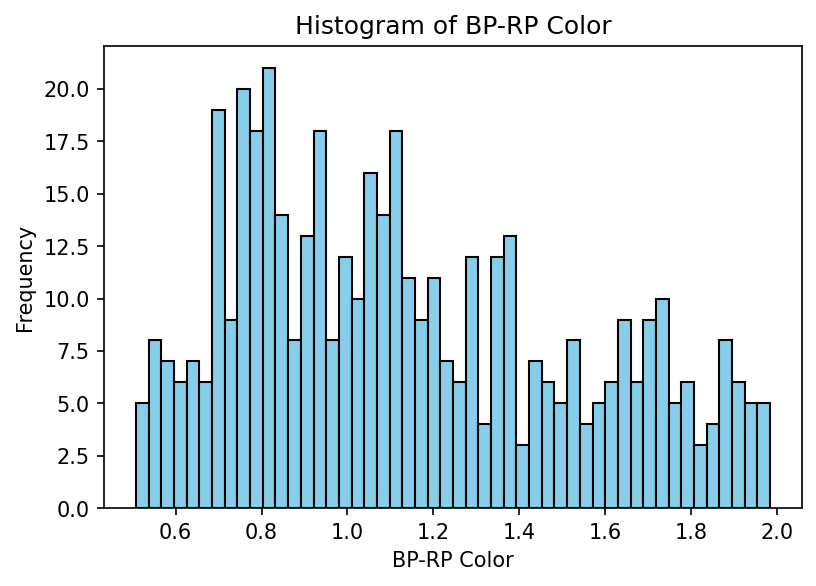

In [16]:
color = combined_df['Phot BP Mean Mag'] - combined_df['Phot RP Mean Mag']

import matplotlib.pyplot as plt

# Create a high-resolution plot
plt.figure(figsize=(6, 4), dpi=150)  # Set the dpi to 300 for high resolution
plt.hist(color, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('BP-RP Color')
plt.ylabel('Frequency')
plt.title('Histogram of BP-RP Color')

plt.show()

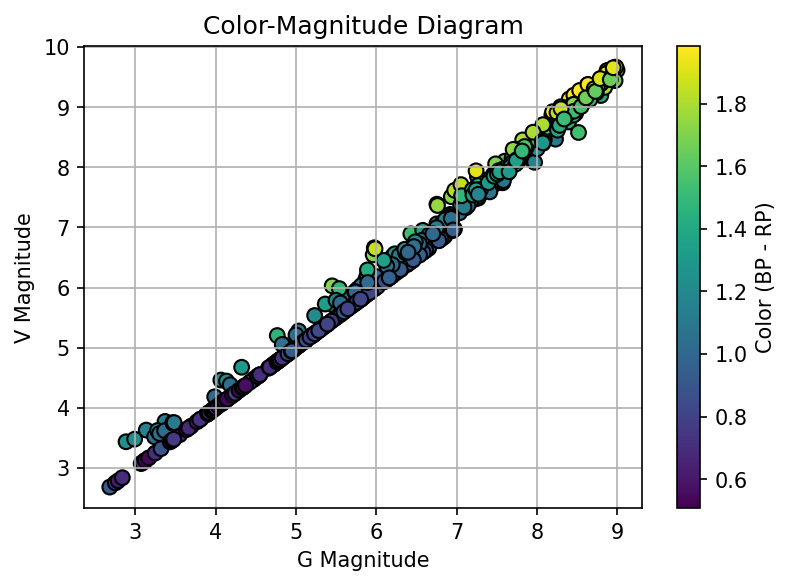

In [17]:
import numpy as np

# Assuming 'color' is a column in combined_df or an array of the same length as the DataFrame
# For example, if 'color' is the difference between 'Phot BP Mean Mag' and 'Phot RP Mean Mag'
color = combined_df['Phot BP Mean Mag'] - combined_df['Phot RP Mean Mag']

# Calculate the conversion factor for colors between 1 and 4
conv = 0.20220 + 0.02489 * color

# Use np.where to apply the conversion conditionally
V_mag = np.where((color >= 1) & (color <= 4),
                 combined_df['Phot BP Mean Mag'] - conv,
                 combined_df['Phot G Mean Mag'])

# Create a high-resolution plot
plt.figure(figsize=(6, 4), dpi=150)  # Set the dpi to 300 for high resolution

# Plot the diagram using the color array for point colors
plt.scatter(combined_df['Phot G Mean Mag'], V_mag, c=color, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('G Magnitude')
plt.ylabel('V Magnitude')
plt.title('Color-Magnitude Diagram')
plt.colorbar(label='Color (BP - RP)')
plt.grid()
plt.show()


In [18]:
# Insert the 'V_mag' column right after the 'DEC' column
combined_df.insert(combined_df.columns.get_loc('DEC') + 1, 'V_mag', V_mag)

# Export the combined DataFrame to an Excel file
combined_excel_file = 'combined_query.xlsx'
combined_df.to_excel(directory + combined_excel_file, index=False)

print(f"Combined results saved to {combined_excel_file}")
display(combined_df.head())

# Adjust the column widths
adjust_column_widths(directory, combined_excel_file)

Combined results saved to combined_query.xlsx


,Source ID,RA,DEC,V_mag,Phot G Mean Mag,Phot BP Mean Mag,Phot RP Mean Mag,Parallax,Teff,HD Number,GJ Number,HIP Number,Object Type
0,6791154257817212672,319.937189,-26.354449,6.445514,6.445514,6.742600,5.773308,54.028805,5209.226562,"HD 202940, HD 202940A","GJ 825.4 A, GJ 9734 A",HIP 105312,SB*
1,853820948481913472,157.604004,55.998984,8.628318,8.084460,8.871609,7.220706,77.407233,4144.666504,HD 237903,GJ 394,NaN,HighPM*
2,4375233191015944192,261.435887,2.106158,7.510053,6.934473,7.754755,6.047124,129.645882,4077.077393,HD 157881,GJ 673,HIP 85295,HighPM*
3,4269932382606282112,275.325136,-2.901846,3.434684,2.883276,3.667640,2.431949,56.043412,4637.000000,HD 168723,GJ 711,HIP 89962,HighPM*
4,4911306239828325760,24.950657,-56.196400,5.860563,5.625487,6.089998,4.995800,122.003472,4902.265137,HD 10361,GJ 66 A,NaN,HighPM*


### 4. Generate the parameter file (needs rewritten)

In [43]:
import pandas as pd
from astroquery.simbad import Simbad
from astroquery.gaia import Gaia

# Customize Simbad to include the HD, GJ, and HIP identifiers and object type
custom_simbad = Simbad()
custom_simbad.add_votable_fields('ids', 'otype')

# Define the ADQL query to get Gaia source IDs
query = """
SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, parallax, teff_gspphot
FROM gaiadr3.gaia_source
WHERE phot_g_mean_mag < 9
  AND dec BETWEEN -90 AND 60
  AND parallax >= 50
  AND (duplicated_source = 'false' OR duplicated_source IS NULL)
  AND (phot_bp_mean_mag - phot_rp_mean_mag) BETWEEN 0.5 AND 2.0
"""

# Execute the query
job = Gaia.launch_job(query)
results = job.get_results()

# Extract Gaia source IDs
source_ids = results['source_id']

# Initialize lists to store data
data = {
    'Gaia DR3 Source ID': [],
    'RA': [],
    'DEC': [],
    'Phot G Mean Mag': [],
    'Phot BP Mean Mag': [],
    'Phot RP Mean Mag': [],
    'Parallax': [],
    'Teff': [],
    'HD Number': [],
    'GJ Number': [],
    'HIP Number': [],
    'Object Type': []
}

# Query Simbad for each Gaia source ID and filter for HD, GJ, and HIP numbers and object types
for source_id in source_ids:
    result_table = custom_simbad.query_object(f"Gaia DR3 {source_id}")
    hd_numbers = []
    gj_numbers = []
    hip_numbers = []
    object_type = None
    
    if result_table is not None:
        ids = result_table['IDS'][0].split('|')
        hd_numbers = [id.strip() for id in ids if id.startswith('HD')]
        gj_numbers = [id.strip() for id in ids if id.startswith('GJ')]
        hip_numbers = [id.strip() for id in ids if id.startswith('HIP')]
        object_type = result_table['OTYPE'][0]

    data['Gaia DR3 Source ID'].append(str(source_id))  # Convert source_id to string
    data['RA'].append(results['ra'][source_ids == source_id][0])
    data['DEC'].append(results['dec'][source_ids == source_id][0])
    data['Phot G Mean Mag'].append(results['phot_g_mean_mag'][source_ids == source_id][0])
    data['Phot BP Mean Mag'].append(results['phot_bp_mean_mag'][source_ids == source_id][0])
    data['Phot RP Mean Mag'].append(results['phot_rp_mean_mag'][source_ids == source_id][0])
    data['Parallax'].append(results['parallax'][source_ids == source_id][0])
    data['Teff'].append(results['teff_gspphot'][source_ids == source_id][0])
    data['HD Number'].append(', '.join(hd_numbers) if hd_numbers else None)
    data['GJ Number'].append(', '.join(gj_numbers) if gj_numbers else None)
    data['HIP Number'].append(', '.join(hip_numbers) if hip_numbers else None)
    data['Object Type'].append(object_type)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Prepare the data for CSV output
output_data = []
for index, row in df.iterrows():
    temperature = row['Teff']
    if pd.isna(temperature) or f"{temperature}" == "--":  # Skip entries without temperature or with "--"
        continue
    
    # Leave the star name as blank
    name = row['Gaia DR3 Source ID']
    spt = ''  # SpT is blank
    vmag = row['Phot G Mean Mag']
    jmag = ''  # Jmag is blank
    output_data.append({
        'Name': name,
        'SpT': spt,
        'Temperature': temperature,
        'Vmag': vmag,
        'Jmag': jmag
    })

# Convert the output data to a DataFrame
output_df = pd.DataFrame(output_data)

# Save the results to a CSV file
csv_file = directory + 'parameter_file.csv'
output_df.to_csv(csv_file, index=False)

print(f"The parameter file have been saved to {csv_file}.")

KeyboardInterrupt: 

In [ ]:
f"{name},{spt},{temperature},{vmag},{jmag}"

'3943232534138172672,,--,8.973732948303223,'

In [41]:
def calculate_habitable_zone(T_eff):
    """
    Calculate the habitable zone boundary based on Kopparapu et al. (2013),
    using only the "Runaway Greenhouse" limit.
    
    Parameters:
    T_eff (float): Effective temperature of the star in Kelvin
    
    Returns:
    float: Distance of the habitable zone boundary in AU
    """

    T_sun = 5780  # Effective temperature of the Sun in Kelvin
    L_ratio = (T_eff / T_sun) ** 4

    # Coefficients for "Runaway Greenhouse" from Table 3 in the paper
    S_eff_sun, a, b, c, d = [1.0512, 1.3242E-4, 1.5418E-8, -7.9895E-12, -1.8328E-15]

    '''
    "Recent Venus": 
    S_eff_sun, a, b, c, d = [1.7753, 1.4316E-4, 2.9875E-9, -7.5702E-12, -1.1635E-15]
    "Runaway Greenhouse": 
    S_eff_sun, a, b, c, d = [1.0512, 1.3242E-4, 1.5418E-8, -7.9895E-12, -1.8328E-15]
    "Moist Greenhouse":
    S_eff_sun, a, b, c, d = [1.0140, 8.1774E-5, 1.7063E-9, -4.3241E-12, -6.6462E-16]
    "Maximum Greenhouse":
    S_eff_sun, a, b, c, d = [0.3438, 5.8942E-5, 1.6558E-9, -3.0045E-12, -5.2983E-16]
    "Early Mars":
    S_eff_sun, a, b, c, d = [0.3179, 5.4513E-5, 1.5313E-9, -2.7786E-12, -4.8997E-16]
    '''

    T_star = T_eff - 5780  # Equation 2
    S_eff = S_eff_sun + a*T_star + b*T_star**2 + c*T_star**3 + d*T_star**4  # Equation 3
    distance = np.sqrt(L_ratio / S_eff)  # Equation 4
    
    return distance

In [42]:
def print_habitable_zone(distance):
    """
    Print the habitable zone boundary in a readable format.
    """
    print(f"Inner edge of the Habitable Zone (Runaway Greenhouse): {distance:.3f} AU")

# Example usage
print("For the Sun:")
T_eff_sun = 5780  # Effective temperature of the Sun in Kelvin
hz_sun = calculate_habitable_zone(T_eff_sun)
print_habitable_zone(hz_sun)

print("\nFor an M-dwarf star:")
T_eff_mdwarf = 3500  # Kelvin
hz_mdwarf = calculate_habitable_zone(T_eff_mdwarf)
print_habitable_zone(hz_mdwarf)

print("\nFor a hotter F-type star:")
T_eff_fstar = 7000  # Kelvin
hz_fstar = calculate_habitable_zone(T_eff_fstar)
print_habitable_zone(hz_fstar)

For the Sun:
Inner edge of the Habitable Zone (Runaway Greenhouse): 0.975 AU

For an M-dwarf star:
Inner edge of the Habitable Zone (Runaway Greenhouse): 0.392 AU

For a hotter F-type star:
Inner edge of the Habitable Zone (Runaway Greenhouse): 1.329 AU


# additional codes (not used for now)

In [17]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(0.1, u.deg)
height = u.Quantity(0.1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
r
# r.pprint(max_lines=12, max_width=130)

INFO: Query finished. [astroquery.utils.tap.core]


dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,
float64,int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,fl

In [5]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
from astropy import units as u
from astropy_healpix import HEALPix

In [6]:
# Set input parameters below ===========
DR3            = True            # Set it to False to select EDR3
target_table   = 'gaia_source'   # Alternative values: 'Astrophysical_parameters/astrophysical_parameters/', etc
hpx_level      = 6
lon            =  80.894 * u.deg # Right Ascencion (ICRS)
lat            = -69.756 * u.deg # Declination (ICRS)
radius         = 0.5     * u.deg

print(f'Input Variables: ')
print(f'* HEALPix level                      = {hpx_level} ')
print(f'* ICRS longitude (~ Right Ascension) = {lon} ')
print(f'* ICRS latitude  (~ Declination)     = {lat} ')
print(f'* Radius                             = {radius} ')
print()

Input Variables: 
* HEALPix level                      = 6 
* ICRS longitude (~ Right Ascension) = 80.894 deg 
* ICRS latitude  (~ Declination)     = -69.756 deg 
* Radius                             = 0.5 deg 



In [7]:
# Download basic parameters ============
output_file    = 'bulk_download_files.txt'
output_dir     = 'downloads'

if os.path.isdir(f'{output_dir}'):
    now          = datetime.now()
    output_dir_2 = output_dir + now.strftime("_%Y-%m-%d")
    print(f'>> Warning: {output_dir} directory exist. Creating alternative directory: {output_dir_2}')
    print()
    output_dir   = output_dir_2
else:
    os.system(f'mkdir {output_dir}')

print(f'Files will be downloaded to: {output_dir}')

Files will be downloaded to: downloads
